In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dfw=pd.read_csv('/content/drive/MyDrive/Olist/Tablas/Tabla1FinalCorrejida.csv' , sep=';')

In [3]:
dfw=dfw.drop(columns=['Estados','order_id','customer_id','order_item_id','product_id','seller_id','freight_value','customer_unique_id','customer_zip_code_prefix','customer_city'])


In [4]:
dfw['order_purchase_timestamp']=pd.to_datetime(dfw['order_purchase_timestamp'])

In [5]:
dfw['fecha']= dfw['order_purchase_timestamp'].dt.date

In [6]:
dfw=dfw[dfw['product_category_name']=='bed_bath_table']

In [7]:
dfw['fecha']=pd.to_datetime(dfw['fecha'])
dfw=dfw.groupby('fecha')['price'].sum().reset_index()

In [8]:
dfw.reset_index(level=0,inplace=True)
dfw.rename(columns= {'fecha': 'ds', 'price' : 'y'}, inplace = True)

In [9]:
data=dfw

In [10]:
from prophet import Prophet

# Instanciamos un modelo de Prophet

prophet = Prophet(yearly_seasonality= True, uncertainty_samples = 50, mcmc_samples=50, interval_width= 0.6)

# Entrenamos el modelo
prophet.fit(data)

# Construimos un dataframe con los x valores futuros que querámos predecir. En este caso, 6 años.
build_forecast = prophet.make_future_dataframe(periods=(6*52), freq='W') #

# Predecimos
forecast = prophet.predict(build_forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6lhdf2w_/nat_b1bw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6lhdf2w_/g63cvt9v.json
12:01:55 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=38682', 'data', 'file=/tmp/tmp6lhdf2w_/nat_b1bw.json', 'init=/tmp/tmp6lhdf2w_/g63cvt9v.json', 'output', 'file=/tmp/tmp6lhdf2w_/prophet_modelr5i4_tbc/prophet_model-20231206120155_1.csv', 'method=sample', 'num_samples=25', 'num_warmup=25', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=38682', 'data', 'file=/tmp/tmp6lhdf2w_/nat_b1bw.json', 'init=/tmp/tmp6lhdf2w_/g63cvt9v.json', 'output', 'file=/tmp/tmp6lhdf2w_/prophet_modelr5i4_tbc/prophet_model-20231206120155_2.csv', 'method=sample', 'num_samples=25', 'num_warmup=25', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

12:02:01 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=38682', 'data', 'file=/tmp/tmp6lhdf2w_/nat_b1bw.json', 'init=/tmp/tmp6lhdf2w_/g63cvt9v.json', 'output', 'file=/tmp/tmp6lhdf2w_/prophet_modelr5i4_tbc/prophet_model-20231206120155_1.csv', 'method=sample', 'num_samples=25', 'num_warmup=25', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6lhdf2w_/prophet_modelr5i4_tbc/prophet_model-20231206120155_1.csv
 console_msgs (if any):
	/tmp/tmp6lhdf2w_/prophet_modelr5i4_tbc/prophet_model-20231206120155_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 25
    num_warmup = 25
    save_warmup = 0 (Default)
    thin = 1 (Default)


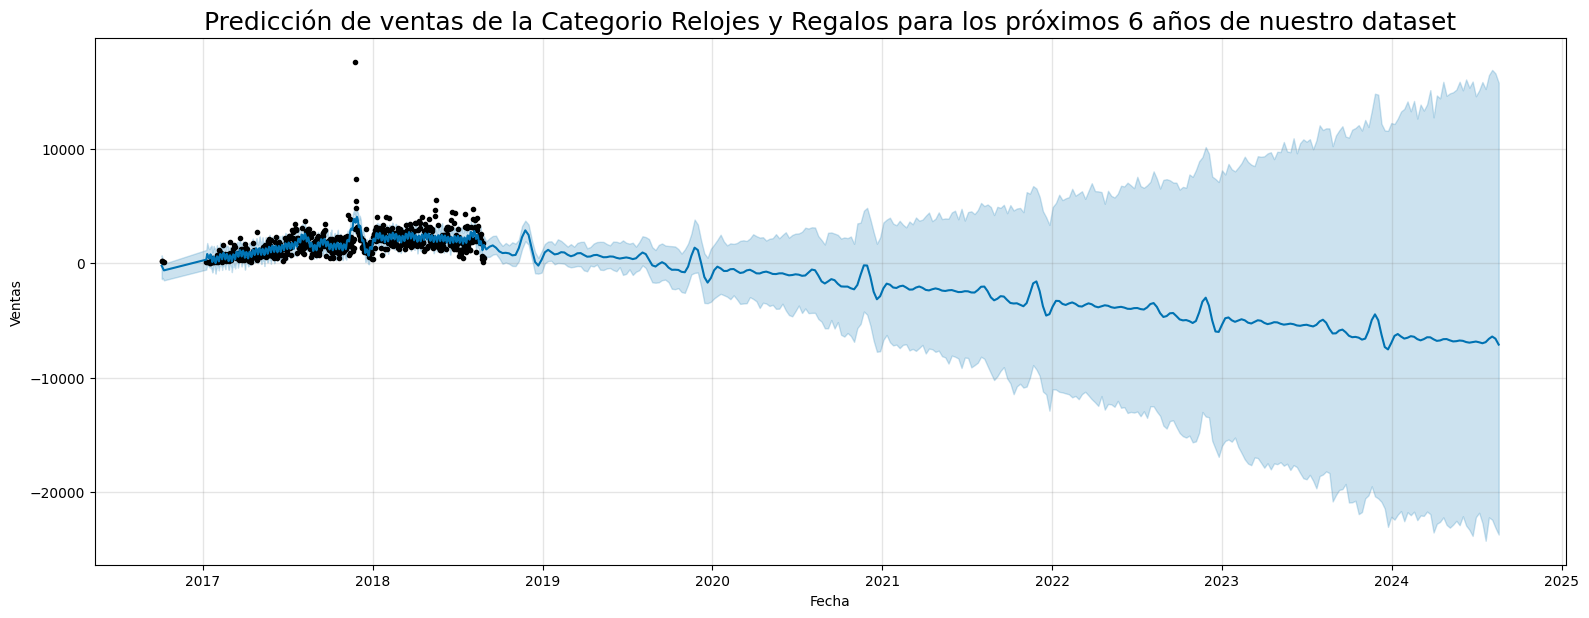

In [11]:
# plot forecasts

prophet.plot(forecast, xlabel='Fecha', ylabel='Ventas', figsize = (16,6))
plt.title('Predicción de ventas de la Categorio Relojes y Regalos para los próximos 6 años de nuestro dataset', fontsize = 18)
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6lhdf2w_/ryzec8v0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6lhdf2w_/tp_bdz8h.json
12:08:39 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=83725', 'data', 'file=/tmp/tmp6lhdf2w_/ryzec8v0.json', 'init=/tmp/tmp6lhdf2w_/tp_bdz8h.json', 'output', 'file=/tmp/tmp6lhdf2w_/prophet_modelu5whc3ir/prophet_model-20231206120839_2.csv', 'method=sample', 'num_samples=25', 'num_warmup=25', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=83725', 'data', 'file=/tmp/tmp6lhdf2w_/ryzec8v0.json', 'init=/tmp/tmp6lhdf2w_/tp_bdz8h.json', 'output', 'file=/tmp/tmp6lhdf2w_/prophet_modelu5whc3ir/prophet_model-20231206120839_1.csv', 'method=sample', 'num_samples=25', 'num_warmup=25', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

12:08:47 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=83725', 'data', 'file=/tmp/tmp6lhdf2w_/ryzec8v0.json', 'init=/tmp/tmp6lhdf2w_/tp_bdz8h.json', 'output', 'file=/tmp/tmp6lhdf2w_/prophet_modelu5whc3ir/prophet_model-20231206120839_1.csv', 'method=sample', 'num_samples=25', 'num_warmup=25', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6lhdf2w_/prophet_modelu5whc3ir/prophet_model-20231206120839_1.csv
 console_msgs (if any):
	/tmp/tmp6lhdf2w_/prophet_modelu5whc3ir/prophet_model-20231206120839_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 25
    num_warmup = 25
    save_warmup = 0 (Default)
    thin = 1 (Default)


Text(0.5, 1.02, 'Prediccion de ventas a 6 años con aumento de 40% (pandemia) para Relojes y Regalos')

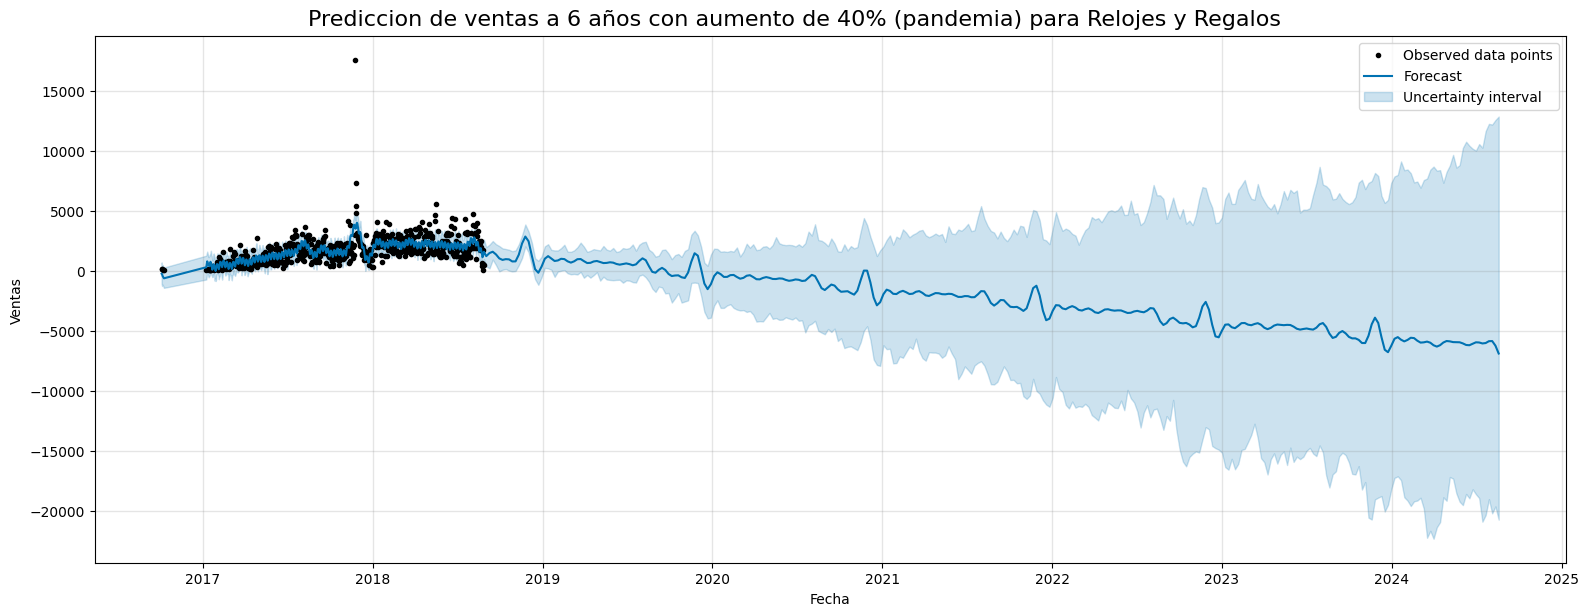

In [15]:
# Instanciamos un modelo de Prophet
fecha_inicio_incremento = '2020-1-23'



prophet = Prophet(yearly_seasonality= True, uncertainty_samples = 50, mcmc_samples=50, interval_width= 0.6)


prophet.add_seasonality(name='Pandemia', period=730, fourier_order=10, prior_scale=0.1, mode='multiplicative', condition_name='custom_condition')
# Identifica las fechas a las que se aplicará el incremento
data['custom_condition'] = (data['ds'] >= fecha_inicio_incremento).astype(int)


# Entrenamos el modelo
prophet.fit(data)

# Crear un DataFrame de fechas futuras para las predicciones
future = prophet.make_future_dataframe(periods=6*52, freq='W')

# Identifica las fechas futuras a las que se aplicará el incremento
future['custom_condition'] = (future['ds'] >= fecha_inicio_incremento).astype(int)

# Construimos un dataframe con los x valores futuros que querámos predecir. En este caso, 6 años.
# build_forecast = prophet.make_future_dataframe(periods=(6*52), freq='W') #

# Predecimos
forecast = prophet.predict(future)
# print(forecast['yhat'])
# print(type(forecast['yhat']))
# Multiplicar las predicciones por el incremento


forecast.loc[forecast.index > 1111 , 'yhat']*=1.4
forecast.loc[forecast.index > 1111 , 'yhat_lower']*=1.4
forecast.loc[forecast.index > 1111 , 'yhat_upper']*=1.4

# Visualizar las predicciones

fig=prophet.plot(forecast, xlabel='Fecha', ylabel='Ventas', figsize = (16,6), include_legend=True)
fig.suptitle('Prediccion de ventas a 6 años con aumento de 40% (pandemia) para Relojes y Regalos', y=1.02, fontsize=16)
